Q1.  Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, 
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuation. 
2. Tokenize the text into words and sentences. 
3. Remove stopwords (using NLTK's stopwords list). 
4. Display word frequency distribution (excluding stopwords).

<Axes: xlabel='Samples', ylabel='Counts'>

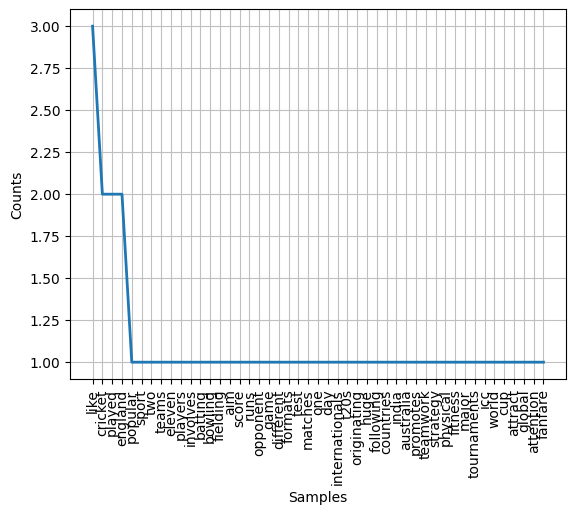

In [2]:
corpus='''Cricket is a popular sport played between two teams of eleven players each. It involves batting, bowling, and fielding, with the aim to score more runs than the opponent. The game is played in different formats like Test matches, One Day Internationals, and T20s. Originating in England, it has a huge following in countries like India, Australia, and England. Cricket promotes teamwork, strategy, and physical fitness. Major tournaments like the ICC World Cup attract global attention and fanfare.'''

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import string

corpus = corpus.lower().translate(str.maketrans('','',string.punctuation))

word_tokens = word_tokenize(corpus)
sent_tokens = sent_tokenize(corpus)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

fdist = FreqDist(filtered_words)
fdist.plot()

Q2: Stemming and Lemmatization 
1. Take the tokenized words from Ques on 1 (after stopword removal). 
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer. 
3. Apply lemmatization on using NLTK's WordNetLemmatizer. 
4. Compare and display results of both techniques.

In [5]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stems = [porter.stem(word) for word in filtered_words]
lancaster_stems = [lancaster.stem(word) for word in filtered_words]
lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]

for w, p, l, lm in zip(filtered_words, porter_stems, lancaster_stems, lemmas):
    print(f"{w:15} | Porter: {p:15} | Lancaster: {l:15} | Lemma: {lm}")

cricket         | Porter: cricket         | Lancaster: cricket         | Lemma: cricket
popular         | Porter: popular         | Lancaster: popul           | Lemma: popular
sport           | Porter: sport           | Lancaster: sport           | Lemma: sport
played          | Porter: play            | Lancaster: play            | Lemma: played
two             | Porter: two             | Lancaster: two             | Lemma: two
teams           | Porter: team            | Lancaster: team            | Lemma: team
eleven          | Porter: eleven          | Lancaster: elev            | Lemma: eleven
players         | Porter: player          | Lancaster: play            | Lemma: player
involves        | Porter: involv          | Lancaster: involv          | Lemma: involves
batting         | Porter: bat             | Lancaster: bat             | Lemma: batting
bowling         | Porter: bowl            | Lancaster: bowl            | Lemma: bowling
fielding        | Porter: field           |

Q3. Regular Expressions and Text Splitting 
1. Take their original text from Ques on 1. 
2. Use regular expressions to: 
a. Extract all words with more than 5 letters. 
b. Extract all numbers (if any exist in their text). 
c. Extract all capitalized words.
3. Use text splitting techniques to:
a. Split the text into words containing only alphabets (removing digits and special characters). 
b. Extract words starting with a vowel.

In [7]:
import re

more_than_5 = re.findall(r'\b\w{6,}\b', corpus)

numbers = re.findall(r'\b\d+\b', corpus)

capitalized = re.findall(r'\b[A-Z][a-z]*\b', corpus)

alpha_words = re.findall(r'\b[a-zA-Z]+\b', corpus)

vowel_words = [word for word in alpha_words if re.match(r'^[AEIOUaeiou]', word)]

print("Words > 5 letters:", more_than_5)
print("Numbers:", numbers)
print("Capitalized words:", capitalized)
print("Alphabetic words:", alpha_words)
print("Words starting with vowel:", vowel_words)

Words > 5 letters: ['cricket', 'popular', 'played', 'between', 'eleven', 'players', 'involves', 'batting', 'bowling', 'fielding', 'opponent', 'played', 'different', 'formats', 'matches', 'internationals', 'originating', 'england', 'following', 'countries', 'australia', 'england', 'cricket', 'promotes', 'teamwork', 'strategy', 'physical', 'fitness', 'tournaments', 'attract', 'global', 'attention', 'fanfare']
Numbers: []
Capitalized words: []
Alphabetic words: ['cricket', 'is', 'a', 'popular', 'sport', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'it', 'involves', 'batting', 'bowling', 'and', 'fielding', 'with', 'the', 'aim', 'to', 'score', 'more', 'runs', 'than', 'the', 'opponent', 'the', 'game', 'is', 'played', 'in', 'different', 'formats', 'like', 'test', 'matches', 'one', 'day', 'internationals', 'and', 'originating', 'in', 'england', 'it', 'has', 'a', 'huge', 'following', 'in', 'countries', 'like', 'india', 'australia', 'and', 'england', 'cricket', 'promot

Q4. Custom Tokenization on & Regex-based Text Cleaning 
1. Take original text from Ques on 1.
2. Write a custom tokenization on func on that:
a. Removes punctuation and special symbols, but keeps contractions (e.g., "isn't" should not be split into "is" and "n't"). 
b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains a single token). 
c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14" should remain as is).

3. Use Regex Substitutions (re.sub) to: 
a. Replace email addresses with '<EMAIL>' placeholder. 
b. Replace URLs with '<URL>' placeholder. 
c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with '<PHONE>' placeholder.

In [8]:
def custom_tokenize(text):
    pattern = r"\b\w+(?:-\w+)*'\w+|\b\w+(?:-\w+)*|\d+\.\d+|\d+"
    return re.findall(pattern, text)

def clean_emails(text):
    return re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '<EMAIL>', text)

def clean_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '<URL>', text)

def clean_phones(text):
    return re.sub(r'(\+?\d{1,3}[ -]?)?\(?\d{3}\)?[ -]?\d{3}[ -]?\d{4}', '<PHONE>', text)

cleaned_text = clean_emails(corpus)
cleaned_text = clean_urls(cleaned_text)
cleaned_text = clean_phones(cleaned_text)

tokens = custom_tokenize(cleaned_text)

print("Custom Tokens:", tokens)

Custom Tokens: ['cricket', 'is', 'a', 'popular', 'sport', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'it', 'involves', 'batting', 'bowling', 'and', 'fielding', 'with', 'the', 'aim', 'to', 'score', 'more', 'runs', 'than', 'the', 'opponent', 'the', 'game', 'is', 'played', 'in', 'different', 'formats', 'like', 'test', 'matches', 'one', 'day', 'internationals', 'and', 't20s', 'originating', 'in', 'england', 'it', 'has', 'a', 'huge', 'following', 'in', 'countries', 'like', 'india', 'australia', 'and', 'england', 'cricket', 'promotes', 'teamwork', 'strategy', 'and', 'physical', 'fitness', 'major', 'tournaments', 'like', 'the', 'icc', 'world', 'cup', 'attract', 'global', 'attention', 'and', 'fanfare']
